In [1]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 58 kB 3.1 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72857 sha256=9af5973173349dda01dc6e2fec7d7f7333013746e1549d72703e1a50568c7080
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [3]:
!kaggle competitions download -c sartorius-cell-instance-segmentation

100% 2.31G/2.31G [00:26<00:00, 32.4MB/s]
100% 2.31G/2.31G [00:26<00:00, 93.3MB/s]


In [4]:
!kaggle datasets download "slawekbiel/sartorius-cell-instance-segmentation-coco"

 87% 11.0M/12.6M [00:00<00:00, 18.2MB/s]
100% 12.6M/12.6M [00:00<00:00, 21.5MB/s]


In [5]:
!unzip sartorius-cell-instance-segmentation-coco.zip

Archive:  sartorius-cell-instance-segmentation-coco.zip
  inflating: annotations_all.json    
  inflating: annotations_train.json  
  inflating: annotations_val.json    


In [6]:
!unzip sartorius-cell-instance-segmentation.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_1.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_2.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_3.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_4.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_1.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_2.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_3.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_4.tif  
  inflating: LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d12h00m_

In [7]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-7q_1upg0
  Running command git clone --filter=blob:none -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-7q_1upg0
  Resolved https://github.com/facebookresearch/detectron2.git to commit ea3a8f8ed3a84cd8a43a6cb4d00f4c277bd69377
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 49 kB 2.8 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 74 kB 3.3 MB/s             
     |████████████████████████████████| 145 kB 34.9 MB/s            
     |████████████████████████████████| 130 kB 43.3 MB/s            
     |████████████████████████████████| 743 kB 40.9 MB/s            
     |████████████████████████████████| 748 kB 30.7 MB/s            
     |████████████████████████████████| 596 kB 40.0 MB/s            
     |████████████████████████████████| 112 kB 45.4 MB/s            
  Preparing metadata (setup.py) ..

In [8]:
#import torch, torchvision
import detectron2
from pathlib import Path
import random, cv2, os
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [9]:
dataDir=Path('./')
cfg = get_cfg()
cfg.INPUT.MASK_FORMAT='bitmask'
register_coco_instances('sartorius_train',{}, 'annotations_train.json', dataDir)
register_coco_instances('sartorius_val',{},'annotations_val.json', dataDir)
metadata = MetadataCatalog.get('sartorius_train')
train_ds = DatasetCatalog.get('sartorius_train')

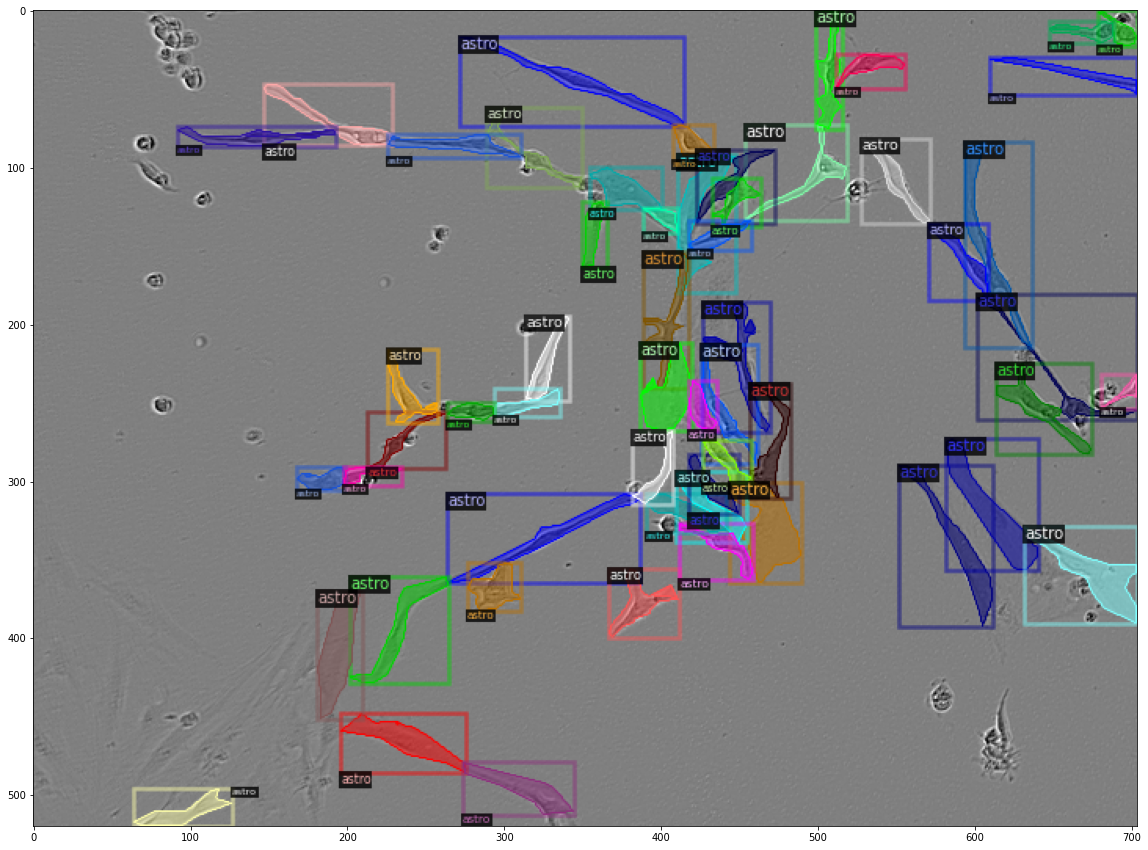

In [10]:
d = train_ds[42]
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=metadata)
out = visualizer.draw_dataset_dict(d)
plt.figure(figsize = (20,15))
plt.imshow(out.get_image()[:, :, ::-1])

In [ ]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("sartorius_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025 
cfg.SOLVER.MAX_ITER = 1000    
cfg.SOLVER.STEPS = []        
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[10/21 11:13:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:15, 27.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

[10/21 11:14:12 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/data/detection_utils.py:433: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  torch.stack([torch.from_numpy(np.ascontiguousarray(x)) for x in masks])
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use tor

[10/21 11:15:35 d2.utils.events]:  eta: 1:05:49  iter: 19  total_loss: 8.435  loss_cls: 1.508  loss_box_reg: 0.3429  loss_mask: 0.6911  loss_rpn_cls: 5.287  loss_rpn_loc: 0.3668  time: 3.8232  data_time: 0.3040  lr: 4.9953e-06  max_mem: 7571M
[10/21 11:16:54 d2.utils.events]:  eta: 1:04:55  iter: 39  total_loss: 5.13  loss_cls: 1.389  loss_box_reg: 0.3769  loss_mask: 0.69  loss_rpn_cls: 2.267  loss_rpn_loc: 0.3242  time: 3.8939  data_time: 0.0547  lr: 9.9902e-06  max_mem: 7601M
[10/21 11:18:13 d2.utils.events]:  eta: 1:02:59  iter: 59  total_loss: 3.063  loss_cls: 1.278  loss_box_reg: 0.3751  loss_mask: 0.6865  loss_rpn_cls: 0.4273  loss_rpn_loc: 0.3071  time: 3.9268  data_time: 0.2037  lr: 1.4985e-05  max_mem: 8758M
[10/21 11:19:32 d2.utils.events]:  eta: 1:01:58  iter: 79  total_loss: 2.867  loss_cls: 1.086  loss_box_reg: 0.484  loss_mask: 0.6805  loss_rpn_cls: 0.3113  loss_rpn_loc: 0.2857  time: 3.9300  data_time: 0.0601  lr: 1.998e-05  max_mem: 8758M
[10/21 11:20:48 d2.utils.events

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)
dataset_dicts = DatasetCatalog.get('sartorius_val')
outs = []
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata = MetadataCatalog.get('sartorius_train'), 
                    
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out_pred = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    visualizer = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get('sartorius_train'))
    out_target = visualizer.draw_dataset_dict(d)
    outs.append(out_pred)
    outs.append(out_target)
_,axs = plt.subplots(len(outs)//2,2,figsize=(40,45))
for ax, out in zip(axs.reshape(-1), outs):
    ax.imshow(out.get_image()[:, :, ::-1])